In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
pd.options.display.max_rows = 999
pd.options.display.max_columns =31

## Fetching the data from the cloud.

In [2]:
url="https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv"
df=pd.read_csv(url)

In [3]:
# df = pd.read_csv("nics-firearm-background-checks.csv")

In [4]:
df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2018-10,Alabama,23244.0,1.0,5218.0,5918.0,229.0,279,0.0,10.0,14.0,1.0,1154.0,1000.0,4.0,0.0,0.0,0.0,0.0,0.0,25.0,22.0,4.0,0.0,0.0,0.0,37123
1,2018-10,Alaska,141.0,11.0,3034.0,3245.0,327.0,286,0.0,2.0,0.0,0.0,326.0,257.0,2.0,43.0,40.0,0.0,0.0,0.0,32.0,18.0,3.0,0.0,1.0,0.0,7768
2,2018-10,Arizona,5078.0,429.0,9886.0,6427.0,980.0,594,0.0,14.0,6.0,2.0,1264.0,671.0,9.0,133.0,11.0,0.0,0.0,0.0,35.0,17.0,3.0,0.0,1.0,0.0,25560
3,2018-10,Arkansas,4415.0,597.0,4312.0,6792.0,220.0,347,97.0,12.0,22.0,0.0,1100.0,1812.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,20.0,1.0,0.0,1.0,3.0,19762
4,2018-10,California,42223.0,0.0,32567.0,23213.0,2738.0,0,0.0,0.0,0.0,0.0,518.0,351.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101623


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 27 columns):
month                        13200 non-null object
state                        13200 non-null object
permit                       13176 non-null float64
permit_recheck               1815 non-null float64
handgun                      13180 non-null float64
long_gun                     13181 non-null float64
other                        6215 non-null float64
multiple                     13200 non-null int64
admin                        13177 non-null float64
prepawn_handgun              11257 non-null float64
prepawn_long_gun             11255 non-null float64
prepawn_other                5830 non-null float64
redemption_handgun           11260 non-null float64
redemption_long_gun          11259 non-null float64
redemption_other             5830 non-null float64
returned_handgun             2915 non-null float64
returned_long_gun            2860 non-null float64
returned_other   

In [6]:
df.shape

(13200, 27)

In [7]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,13176.000000,1815.000000,13180.000000,13181.000000,6215.000000,13200.000000,13177.000000,11257.000000,11255.000000,5830.000000,11260.000000,11259.000000,5830.000000,2915.000000,2860.000000,2530.000000,1705.000000,1540.000000,3465.000000,3465.000000,3465.000000,3190.000000,3465.000000,2970.000000,13200.000000
mean,6915.046220,1887.507438,6169.832853,7806.017905,402.512953,273.911212,56.836533,4.932309,7.674722,0.221441,422.033037,593.274891,2.021098,37.574271,9.158741,1.157312,0.137243,0.125974,20.090620,16.406061,1.657720,0.575549,0.607792,0.110438,22536.096894
std,26139.844084,15314.651595,8907.134048,9230.017769,1317.958895,773.417971,589.693343,11.027460,16.082503,1.112409,809.287284,941.013274,4.913009,96.359468,23.631143,4.448261,0.973199,0.833649,85.860035,67.351105,6.136111,2.769797,2.435187,0.419215,35183.876871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,930.000000,2105.000000,20.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4743.750000
50%,614.500000,0.000000,3192.000000,5133.000000,139.000000,128.000000,0.000000,0.000000,1.000000,0.000000,45.000000,176.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12669.500000
75%,4686.250000,3.000000,7570.500000,10404.000000,402.000000,306.000000,0.000000,5.000000,8.000000,0.000000,575.000000,863.000000,2.000000,26.000000,6.000000,0.000000,0.000000,0.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000,26337.250000
max,522188.000000,199766.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,810.000000,168.000000,64.000000,13.000000,12.000000,1017.000000,913.000000,91.000000,70.000000,56.000000,4.000000,541978.000000


## Checking for duplicates

In [8]:
df_duplicates = df.drop_duplicates()
df_duplicates.shape

(13200, 27)

## Number of missing value per column

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
dtype: int64

In [10]:
# print(df[df.isnull().any(axis=1)][null_columns].head())

## Filling missing values

After going through the columns and it's type, I concluded to fill the missing values with 0. 

Reason to this is because the information only tells us how many background check were performed for each permit type, and if the value is NaN then it must mean that there weren't any or unavailable.

In [11]:
df.fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 27 columns):
month                        13200 non-null object
state                        13200 non-null object
permit                       13200 non-null float64
permit_recheck               13200 non-null float64
handgun                      13200 non-null float64
long_gun                     13200 non-null float64
other                        13200 non-null float64
multiple                     13200 non-null int64
admin                        13200 non-null float64
prepawn_handgun              13200 non-null float64
prepawn_long_gun             13200 non-null float64
prepawn_other                13200 non-null float64
redemption_handgun           13200 non-null float64
redemption_long_gun          13200 non-null float64
redemption_other             13200 non-null float64
returned_handgun             13200 non-null float64
returned_long_gun            13200 non-null float64
returned_ot

In [12]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,6902.473409,259.532273,6160.484621,7794.781970,189.516515,273.911212,56.737500,4.206288,6.543864,0.097803,360.006970,506.036515,0.892652,8.297652,1.984394,0.221818,0.017727,0.014697,5.273788,4.306591,0.435152,0.139091,0.159545,0.024848,22536.096894
std,26117.729545,5714.566395,8903.618041,9228.119007,926.360961,773.417971,589.184101,10.332363,15.097468,0.747384,762.242036,894.111646,3.415723,47.883896,11.627469,1.999707,0.352693,0.287522,44.865026,35.250574,3.227004,1.383576,1.275872,0.204104,35183.876871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,924.000000,2092.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4743.750000
50%,610.000000,0.000000,3185.000000,5125.500000,0.000000,128.000000,0.000000,0.000000,0.000000,0.000000,3.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12669.500000
75%,4661.250000,0.000000,7564.000000,10400.250000,119.000000,306.000000,0.000000,4.000000,6.000000,0.000000,442.000000,674.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26337.250000
max,522188.000000,199766.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,810.000000,168.000000,64.000000,13.000000,12.000000,1017.000000,913.000000,91.000000,70.000000,56.000000,4.000000,541978.000000


## Parsing column 'month' into month, year

In [13]:
df['str_split'] = df.month.str.split('-')
df['year'] = df.str_split.str.get(0)
df['months'] = df.str_split.str.get(1)

print(df.head(5))

     month       state   permit  permit_recheck  handgun  long_gun   other  \
0  2018-10     Alabama  23244.0             1.0   5218.0    5918.0   229.0   
1  2018-10      Alaska    141.0            11.0   3034.0    3245.0   327.0   
2  2018-10     Arizona   5078.0           429.0   9886.0    6427.0   980.0   
3  2018-10    Arkansas   4415.0           597.0   4312.0    6792.0   220.0   
4  2018-10  California  42223.0             0.0  32567.0   23213.0  2738.0   

   multiple  admin  prepawn_handgun  prepawn_long_gun  prepawn_other  \
0       279    0.0             10.0              14.0            1.0   
1       286    0.0              2.0               0.0            0.0   
2       594    0.0             14.0               6.0            2.0   
3       347   97.0             12.0              22.0            0.0   
4         0    0.0              0.0               0.0            0.0   

   redemption_handgun  redemption_long_gun  redemption_other  \
0              1154.0             

## EDA 

In [14]:
eda = df

In [15]:
eda.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,str_split,year,months
0,2018-10,Alabama,23244.0,1.0,5218.0,5918.0,229.0,279,0.0,10.0,14.0,1.0,1154.0,1000.0,4.0,0.0,0.0,0.0,0.0,0.0,25.0,22.0,4.0,0.0,0.0,0.0,37123,"[2018, 10]",2018,10
1,2018-10,Alaska,141.0,11.0,3034.0,3245.0,327.0,286,0.0,2.0,0.0,0.0,326.0,257.0,2.0,43.0,40.0,0.0,0.0,0.0,32.0,18.0,3.0,0.0,1.0,0.0,7768,"[2018, 10]",2018,10
2,2018-10,Arizona,5078.0,429.0,9886.0,6427.0,980.0,594,0.0,14.0,6.0,2.0,1264.0,671.0,9.0,133.0,11.0,0.0,0.0,0.0,35.0,17.0,3.0,0.0,1.0,0.0,25560,"[2018, 10]",2018,10
3,2018-10,Arkansas,4415.0,597.0,4312.0,6792.0,220.0,347,97.0,12.0,22.0,0.0,1100.0,1812.0,2.0,0.0,0.0,0.0,0.0,0.0,9.0,20.0,1.0,0.0,1.0,3.0,19762,"[2018, 10]",2018,10
4,2018-10,California,42223.0,0.0,32567.0,23213.0,2738.0,0,0.0,0.0,0.0,0.0,518.0,351.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101623,"[2018, 10]",2018,10


In [16]:
# ax=df.plot(x="state", y="permit_recheck", kind="bar")
# df.plot(x="state",y="handgun", kind="bar", ax=ax, color="blue")
# df.plot(x="state", y="long_gun", kind="bar", ax=ax, color="red")
# plt.show()

In [17]:
x =eda["state"].unique()
x

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [18]:
eda.loc[eda["state"]=='Alabama'].handgun.sum()


2315319.0

In [19]:
data = []
for state in eda["state"].unique():
    data.append(eda.loc[eda["state"]==state].totals.sum())
print(list(data))

[7221227, 1226445, 4842269, 4026260, 20497380, 6640050, 3357936, 543703, 9118, 13036312, 7814024, 16902, 212899, 2190376, 18141182, 8710972, 2502556, 2818143, 35071893, 5047492, 1361969, 672, 2205166, 2797587, 7795695, 6932201, 3848459, 7101685, 2015854, 1219309, 1871315, 1716774, 1250473, 2251438, 5038419, 8360844, 1017179, 9250156, 4943903, 4143075, 14263187, 224710, 316115, 4337664, 1317556, 8075880, 21174224, 4659337, 529766, 16590, 6409848, 7035684, 3473070, 5634213, 959323]


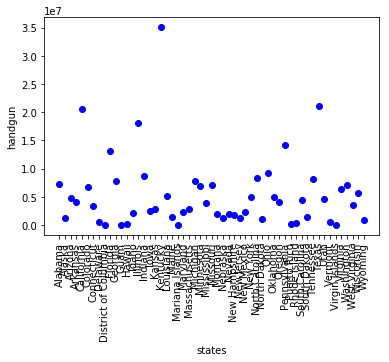

In [21]:
_ = plt.scatter(x=x,y=data,color="blue")
_ = plt.xlabel('states')
_ = plt.ylabel('handgun')
plt.xticks(rotation=90)
plt.show()

TypeError: savefig() missing 1 required positional argument: 'fname'

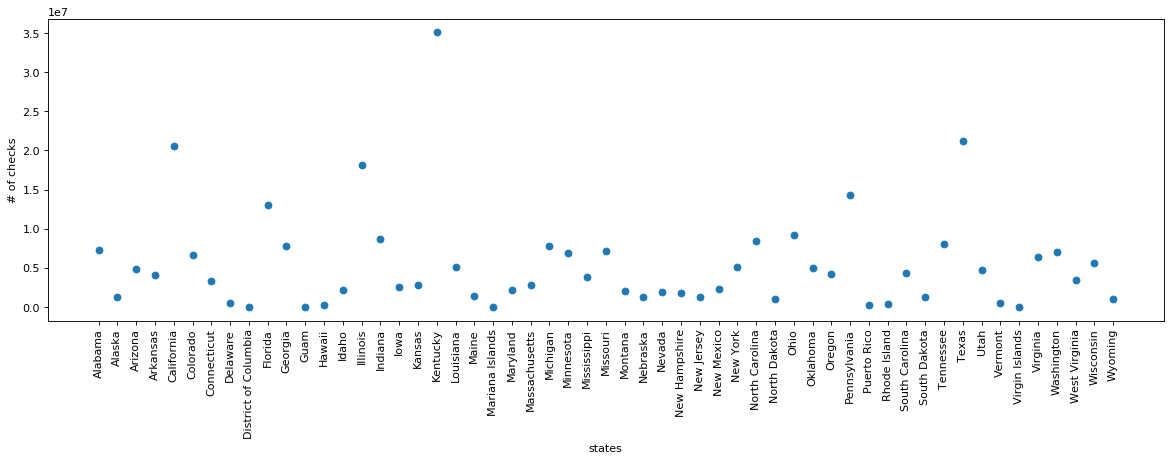

In [25]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
# df['year'] = pd.to_datetime(df['year'])
_ = plt.scatter(x=x,y=data)
_ = plt.xlabel('states')
_ = plt.ylabel('# of checks')
plt.xticks(rotation=90)
# plt.show()
plt.savefig()

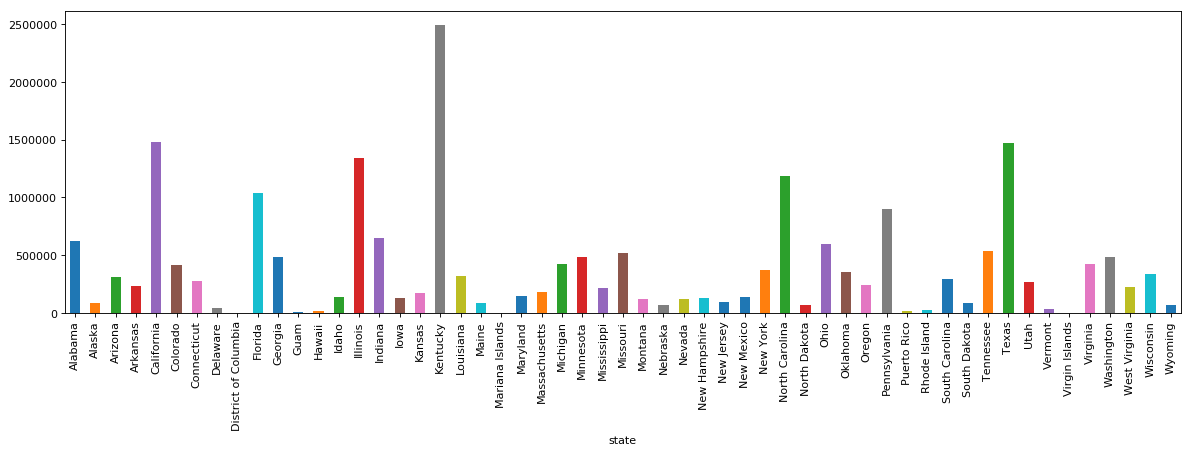

In [23]:
fig=plt.figure(figsize=(18, 5), dpi= 80, facecolor='w', edgecolor='k')
df['year'] = pd.to_datetime(df['year'])
ds= df[df['year'].dt.year == 2014]
ds.groupby(['state'])["totals"].apply(lambda x : x.astype(int).sum()).plot( kind="bar")